In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.optimize import curve_fit

In [4]:
# Load the dataset
df = pd.read_csv('sample_data/Countries.csv')

# Preliminary data inspection
print(df.head())
print("\nData Description:\n", df.describe())

  Country Name Country Code  Year  Agriculture (% GDP)  \
0  Afghanistan          AFG  2000            27.501127   
1  Afghanistan          AFG  2001            27.501127   
2  Afghanistan          AFG  2002            38.627892   
3  Afghanistan          AFG  2003            37.418855   
4  Afghanistan          AFG  2004            29.721067   

   Ease of Doing Business  Education Expenditure (% GDP)  Export (% GDP)  \
0               40.717968                      13.670101             NaN   
1               40.717968                      13.670101             NaN   
2               40.717968                      13.670101             NaN   
3               40.717968                      13.670101             NaN   
4               40.717968                      13.670101             NaN   

            GDP  Health Expenditure (% GDP)  Import (% GDP)  ...  Population  \
0  1.415197e+10                   10.902580             NaN  ...  19542982.0   
1  1.415197e+10                   

In [103]:
# Data Cleaning - Fill missing values with mean for numerical columns
df.fillna(df.mean(numeric_only=True), inplace=True)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['GDP', 'Health Expenditure (% GDP)', 'Education Expenditure (% GDP)']])

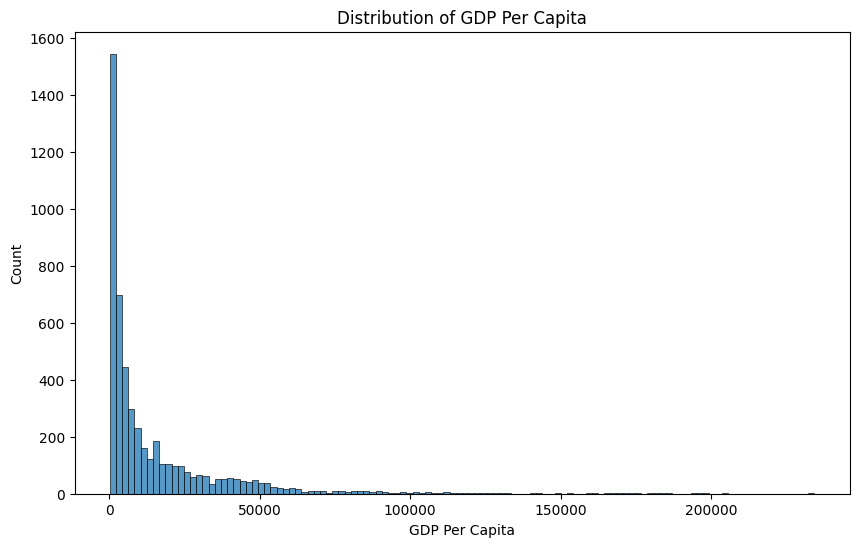

In [ ]:
# A function to create and show a histogram/bar chart/pie chart
def plot_distribution(data, plot_type="histogram", title=""):
    """
    Plots a distribution of data using the specified plot type.

    :param data: The data to plot.
    :param plot_type: The type of plot to create (histogram, bar, or pie).
    :param title: The title of the plot.
    """
    plt.figure(figsize=(10, 6))
    if plot_type == "histogram":
        sns.histplot(data, kde=False)
    elif plot_type == "bar":
        data.value_counts().plot(kind='bar')
    elif plot_type == "pie":
        data.value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(title)
    plt.show()

plot_distribution(df['GDP Per Capita'], plot_type="histogram", title="Distribution of GDP Per Capita")

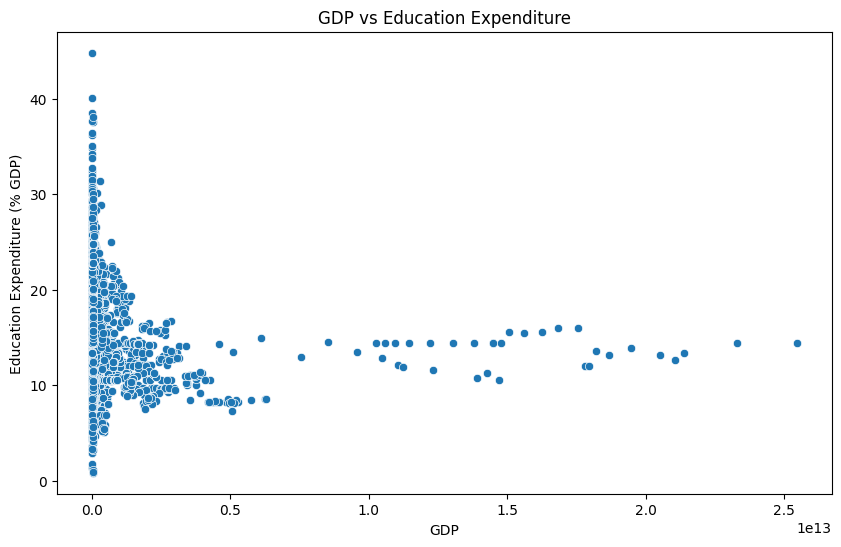

In [ ]:
# A function to create and show a line/scatter graph
def plot_line_scatter(x, y, title=""):
    """
    Plots a line/scatter graph.

    :param x: The data for the x-axis.
    :param y: The data for the y-axis.
    :param title: The title of the plot.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y)  # Using keyword arguments
    plt.title(title)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show()

plot_line_scatter(df['GDP'], df['Education Expenditure (% GDP)'], title="GDP vs Education Expenditure")

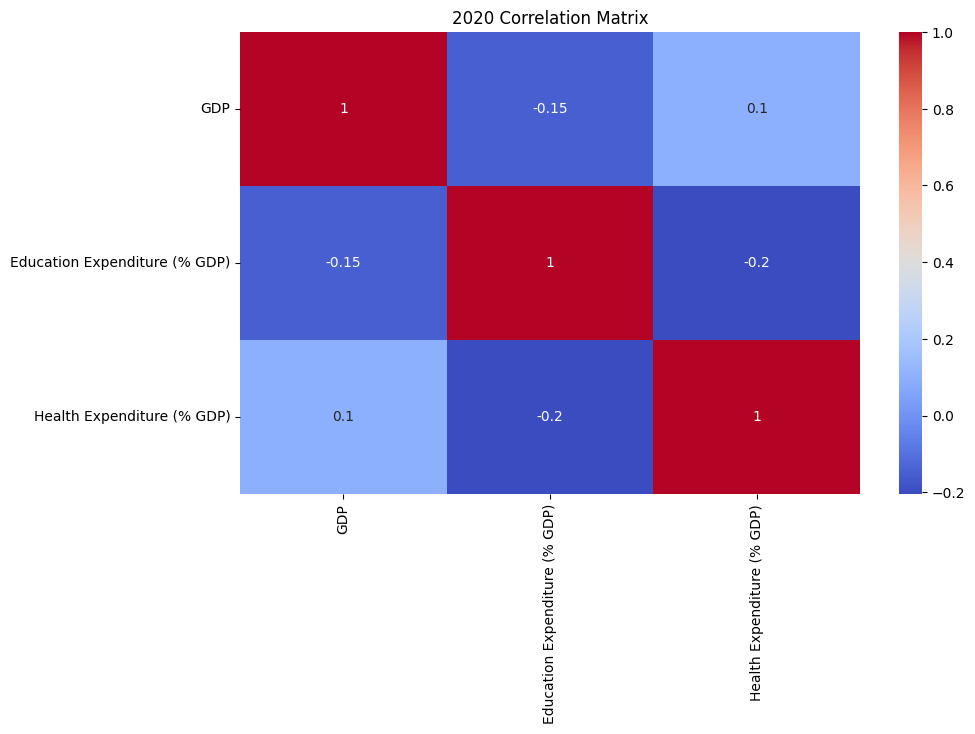

In [30]:
def plot_yearly_correlation_matrix(df, year, indicators, plot_type="heatmap", title=""):
    """
    Plots a correlation matrix for the specified year using the given plot type.

    :param df: The DataFrame containing the data.
    :param year: The year to plot data for.
    :param indicators: List of indicators to include in the correlation matrix.
    :param plot_type: The type of plot to create (heatmap, corner, box, or violin).
    :param title: The title of the plot.
    """
    # Filter the DataFrame for the specified year and indicators
    yearly_data = df[df['Year'] == year][indicators]

    plt.figure(figsize=(10, 6))
    if plot_type == "heatmap":
        # Calculate correlation matrix for the filtered data
        corr_matrix = yearly_data.corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    elif plot_type == "box":
        sns.boxplot(data=yearly_data)
    elif plot_type == "violin":
        sns.violinplot(data=yearly_data)
    plt.title(title if title else f'Correlation Matrix for {year}')
    plt.show()

indicators = ['GDP', 'Education Expenditure (% GDP)', 'Health Expenditure (% GDP)']
plot_yearly_correlation_matrix(df, 2020, indicators, plot_type="heatmap", title="2020 Correlation Matrix")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2 clusters silhouette score = 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3 clusters silhouette score = 0.51


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4 clusters silhouette score = 0.51


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 clusters silhouette score = 0.52


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6 clusters silhouette score = 0.51


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7 clusters silhouette score = 0.52


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8 clusters silhouette score = 0.48


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9 clusters silhouette score = 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10 clusters silhouette score = 0.50
Best number of clusters = 2


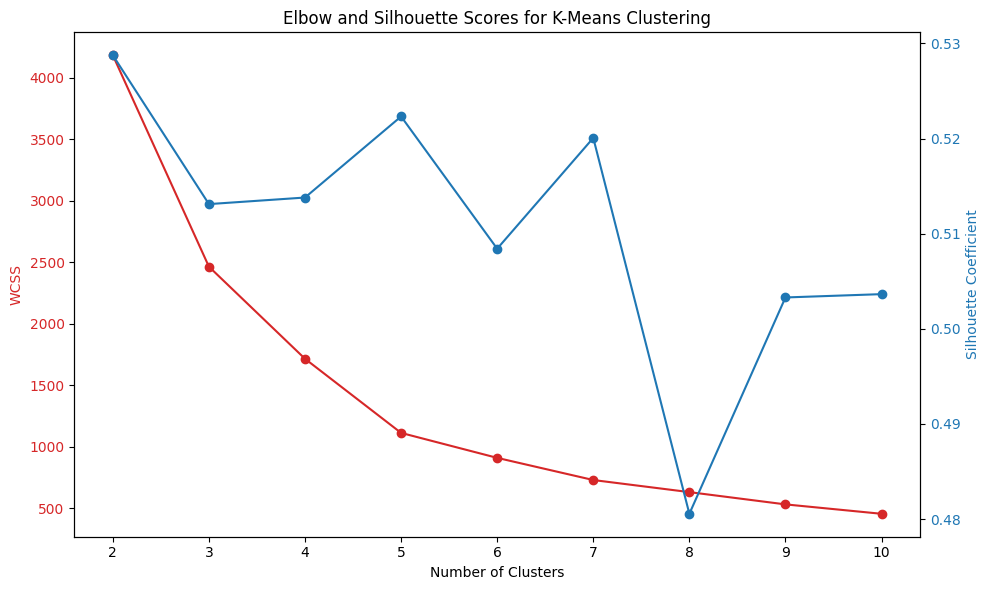

In [79]:
# A function to create and show an elbow/silhouette plot with detailed silhouette scores
def plot_elbow_silhouette(data, max_clusters=10, title=""):
    """
    Plots an elbow and silhouette score graph to determine the optimal number of clusters,
    and prints out the silhouette scores for each number of clusters.

    :param data: The data to plot.
    :param max_clusters: The maximum number of clusters to try.
    :param title: The title of the plot.
    """
    wcss = []
    silhouette_coefficients = []

    # Determine WCSS and silhouette scores for various cluster sizes
    for i in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
        silhouette_score_val = silhouette_score(data, kmeans.labels_)
        silhouette_coefficients.append(silhouette_score_val)
        print(f"{i} clusters silhouette score = {silhouette_score_val:.2f}")

    # Identify the optimal number of clusters as the one with the highest silhouette score
    best_num_clusters = np.argmax(silhouette_coefficients) + 2
    print(f"Best number of clusters = {best_num_clusters}")

    # Plotting the elbow and silhouette scores
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.set_xlabel('Number of Clusters')
    ax1.set_ylabel('WCSS', color='tab:red')
    ax1.plot(range(2, max_clusters+1), wcss, 'o-', color='tab:red', label='WCSS')
    ax1.tick_params(axis='y', labelcolor='tab:red')
    ax1.set_xticks(range(2, max_clusters+1))

    ax2 = ax1.twinx()
    ax2.set_ylabel('Silhouette Coefficient', color='tab:blue')
    ax2.plot(range(2, max_clusters+1), silhouette_coefficients, 'o-', color='tab:blue', label='Silhouette Coefficient')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    plt.title(title)
    fig.tight_layout()
    plt.show()

    return best_num_clusters


best_clusters=plot_elbow_silhouette(df_scaled, max_clusters=10, title="Elbow and Silhouette Scores for K-Means Clustering")


In [80]:
# Function to perform k-means clustering
def kmeans_clustering(data, n_clusters):
    """
    Applies k-means clustering to the data.

    :param data: DataFrame or array-like, the data to cluster.
    :param n_clusters: int, the number of clusters.
    :return: tuple of cluster centers and labels.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    return kmeans.cluster_centers_, kmeans.labels_



In [81]:
# Function for line fitting using numpy's polyfit
def fit_line(x, y):
    """
    Fits a line to the given x and y data.

    :param x: array-like, independent variable data.
    :param y: array-like, dependent variable data.
    :return: tuple of slope and intercept of the fitted line.
    """
    coefficients = np.polyfit(x, y, 1)
    poly = np.poly1d(coefficients)
    return poly

In [98]:
# Function to plot the clusters
def plot_clusters(data, cluster_labels, centers, feature_x_name, feature_y_name):
    """
    Plots the data points with cluster labels and cluster centers, labeling the axes with the specified feature names.

    :param data: DataFrame or array-like, the data to plot.
    :param cluster_labels: array-like, the cluster labels for each data point.
    :param centers: array-like, the cluster centers.
    :param feature_x_name: str, name of the feature for the x-axis.
    :param feature_y_name: str, name of the feature for the y-axis.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', label='Data Points')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, label='Cluster Centers')
    plt.title('Clustered Data')
    plt.xlabel(feature_x_name)
    plt.ylabel(feature_y_name)
    plt.legend()
    plt.show()

In [101]:
# Function to plot the fitted line along with the data points
def plot_fitted_line(x, y, fitted_function, x_label="Independent Variable", y_label="Dependent Variable", title="Fitted Line Plot"):
    """
    Plots the fitted line over the data points.

    :param x: array-like, independent variable data.
    :param y: array-like, dependent variable data.
    :param fitted_function: function, the fitted line function.
    :param x_label: str, label for the x-axis.
    :param y_label: str, label for the y-axis.
    :param title: str, title of the plot.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Data Points')
    plt.plot(x, fitted_function(x), color='red', label='Fitted Line')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


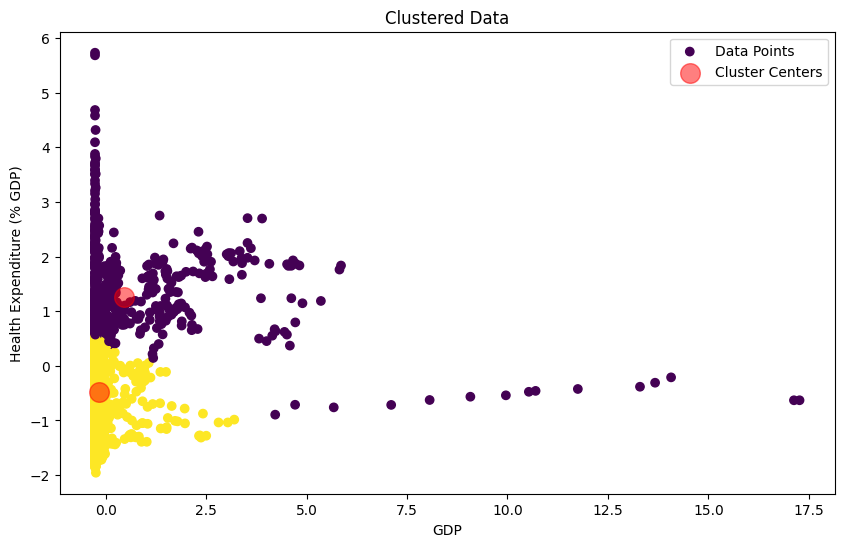

In [99]:

# Define the number of clusters to be used for k-means
num_clusters = best_clusters # determined from the elbow plot in a real analysis
print(num_clusters)
# Cluster the data
centers, labels = kmeans_clustering(df_scaled, num_clusters)
feature_names = ['GDP', 'Health Expenditure (% GDP)']
# Plotting the clusters
plot_clusters(df_scaled, labels, centers,feature_names[0], feature_names[1])





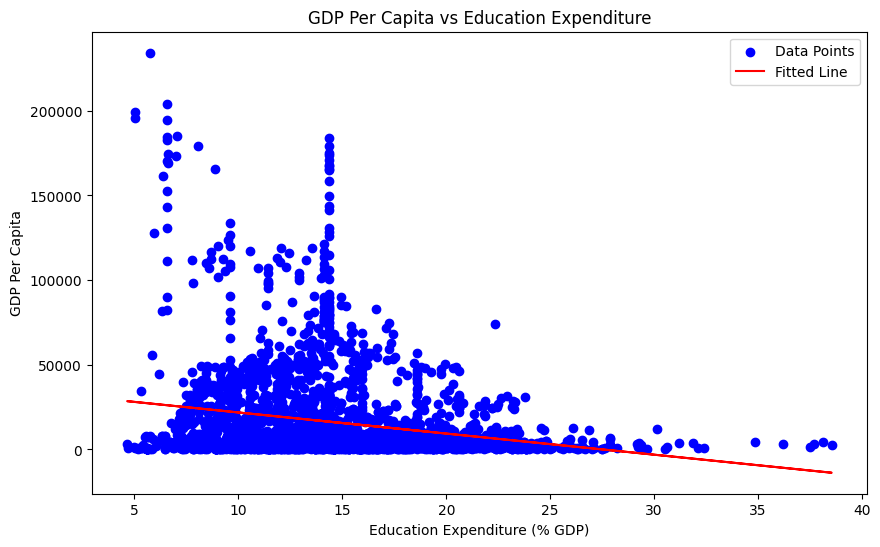

Cluster Centers:
 [[ 0.45466923  1.2626621 ]
 [-0.1697828  -0.47150389]]


In [102]:
# Fitting a line to GDP per Capita vs Education Expenditure
poly = fit_line(df['Education Expenditure (% GDP)'], df['GDP Per Capita'])

# Plotting the fitted line
plot_fitted_line(df['Education Expenditure (% GDP)'], df['GDP Per Capita'], poly,
                 x_label="Education Expenditure (% GDP)",
                 y_label="GDP Per Capita",
                 title="GDP Per Capita vs Education Expenditure")

# Finally, print out the cluster centers for the report
print("Cluster Centers:\n", centers)